## Influência da amostragem em imagens

### 1. Leitura da imagem

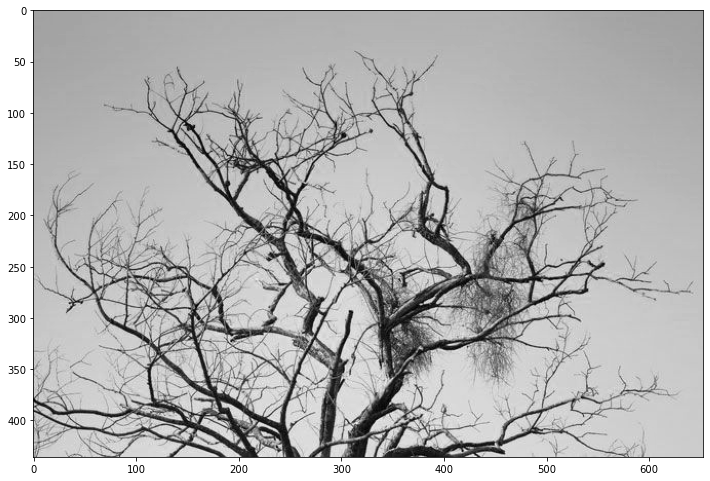

In [1]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('tree.tiff')
plt.figure(figsize=[12,12])
plt.imshow(img, 'gray')

### 2. Amostragem da imagem

Vamos aumentar a taxa de amostragem da imagem. A ideia é definir um intervalo de amostragem, I, e criar uma nova imagem contendo pixels da imagem original amostrados a cada intervalo I. 

Por exemplo, na imagem abaixo é utilizado um intervalo de amostragem igual a 2. Isso quer dizer que a cada 2 pixels (pixels mostrados em cinza) armazenamos o valor do pixel em uma nova imagem.

![amostragem.png não encontrada](https://i.imgur.com/83enlHO.png)

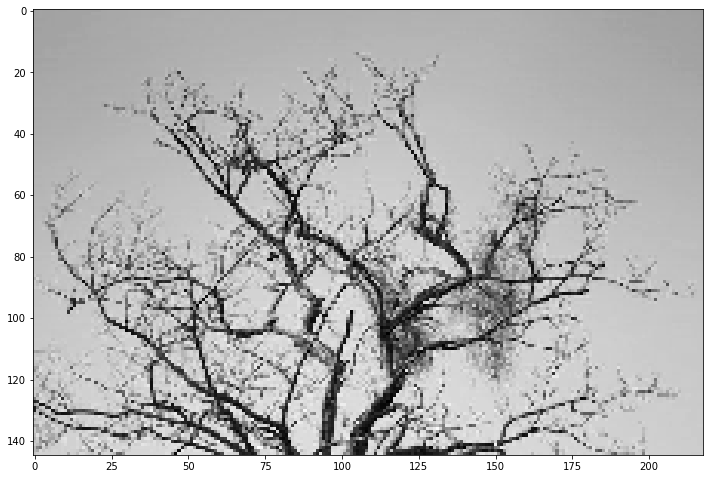

In [2]:
def resample_image(img, sampling_interv_r, sampling_interv_c):
    '''Amostra uma imagem em intervalos definidos por sampling_interv_r (linhas) 
       e sampling_interv_c (colunas)'''
    
    num_rows, num_cols = img.shape

    # Calcula tamanho da imagem final
    num_rows_resampled = (num_rows+1)//sampling_interv_r
    num_cols_resampled = (num_cols+1)//sampling_interv_c

    img_resampled = np.zeros([num_rows_resampled, num_cols_resampled])
    for row in range(num_rows_resampled):
        for col in range(num_cols_resampled):
            img_resampled[row, col] = img[sampling_interv_r*row, sampling_interv_c*col]
            
    return img_resampled

# Define intervalo de amostragem nas linhas e nas colunas. 
sampling_interv_r = 3
sampling_interv_c = 3
img_resampled = resample_image(img, sampling_interv_r, sampling_interv_c)
        
plt.figure(figsize=[12,12])
plt.imshow(img_resampled, 'gray')   

Notamos no resultado o que podemos chamar de "serrilhado". Isso ocorre porque o intervalo de amostragem é maior do que o necessário para representar pequenos detalhes da imagem. De forma equivalente, dizemos que a taxa de amostragem é menor do que a maior frequência contida no sinal.

### 3. Reduzindo o aliasing

Para reduzirmos o aliasing, podemos suavizar a imagem antes de reamostrar. A suavização elimina altas frequências da imagem.

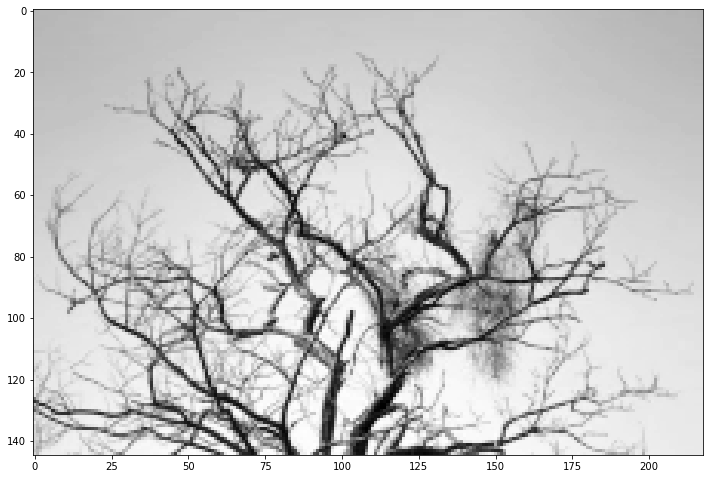

In [3]:
import scipy.ndimage as ndi

img_smooth = ndi.gaussian_filter(img, sigma=1)
img_smooth_resampled = resample_image(img_smooth, sampling_interv_r, sampling_interv_c)
        
plt.figure(figsize=[12,12])
plt.imshow(img_smooth_resampled, 'gray')   